In [32]:
# part4-3
# 교재 197
# 면적 그래프 
import pandas as pd
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)
# 데이터 불러오기
df = pd.read_excel('./data-4/시도별_전출입_인구수.xlsx')
df.head()
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합부분)
df = df.ffill()
df.head()
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
# 전출지별 열을 삭제하기
df_seoul = df_seoul.drop(['전출지별'], axis=1)
# '전입지별'을 '전입지' 열이름 변경하기
df_seoul = df_seoul.rename({'전입지별': '전입지'}, axis=1)
df_seoul
# 전입지 열을 행 인덱스로 만들기
df_seoul = df_seoul.set_index('전입지')
df_seoul.head()
col_years = list( map(str, range(1970,2018) ) ) # ['1970', '1971']
df_4 = df_seoul.loc[ ['충청남도', '경상북도', '강원도', '전라남도'], col_years ]
df_4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [33]:
df_4.info()
df_4 = df_4.astype( int )
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 충청남도 to 전라남도
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1970    4 non-null      object
 1   1971    4 non-null      object
 2   1972    4 non-null      object
 3   1973    4 non-null      object
 4   1974    4 non-null      object
 5   1975    4 non-null      object
 6   1976    4 non-null      object
 7   1977    4 non-null      object
 8   1978    4 non-null      object
 9   1979    4 non-null      object
 10  1980    4 non-null      object
 11  1981    4 non-null      object
 12  1982    4 non-null      object
 13  1983    4 non-null      object
 14  1984    4 non-null      object
 15  1985    4 non-null      object
 16  1986    4 non-null      object
 17  1987    4 non-null      object
 18  1988    4 non-null      object
 19  1989    4 non-null      object
 20  1990    4 non-null      object
 21  1991    4 non-null      object
 22  1992    4 non-null      objec

In [5]:
df_4 = df_4.T # df_4.transpose() 전치행렬 (행과 열 바꾼 것)
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


       1970   1971   1972   1973   1974   1975   1976   1977   1978   1979  \
전입지                                                                          
충청남도  15954  18943  23406  27139  25509  51205  41447  43993  48091  45388   
경상북도  11868  16459  22073  27531  26902  46177  40376  41155  42940  43565   
강원도    9352  12885  13561  16481  15479  27837  25927  25415  26700  27599   
전라남도  10513  16755  20157  22160  21314  46610  46251  43430  44624  47934   

      ...   2008   2009   2010   2011   2012   2013   2014   2015   2016  \
전입지   ...                                                                  
충청남도  ...  27458  24889  24522  24723  22269  21486  21473  22299  21741   
경상북도  ...  15425  16569  16042  15818  15191  14420  14456  15113  14236   
강원도   ...  23668  23331  22736  23624  22332  20601  21173  22659  21590   
전라남도  ...  16601  17468  16429  15974  14765  14187  14591  14598  13065   

       2017  
전입지          
충청남도  21020  
경상북도  12464  
강원도   21016  
전라남도

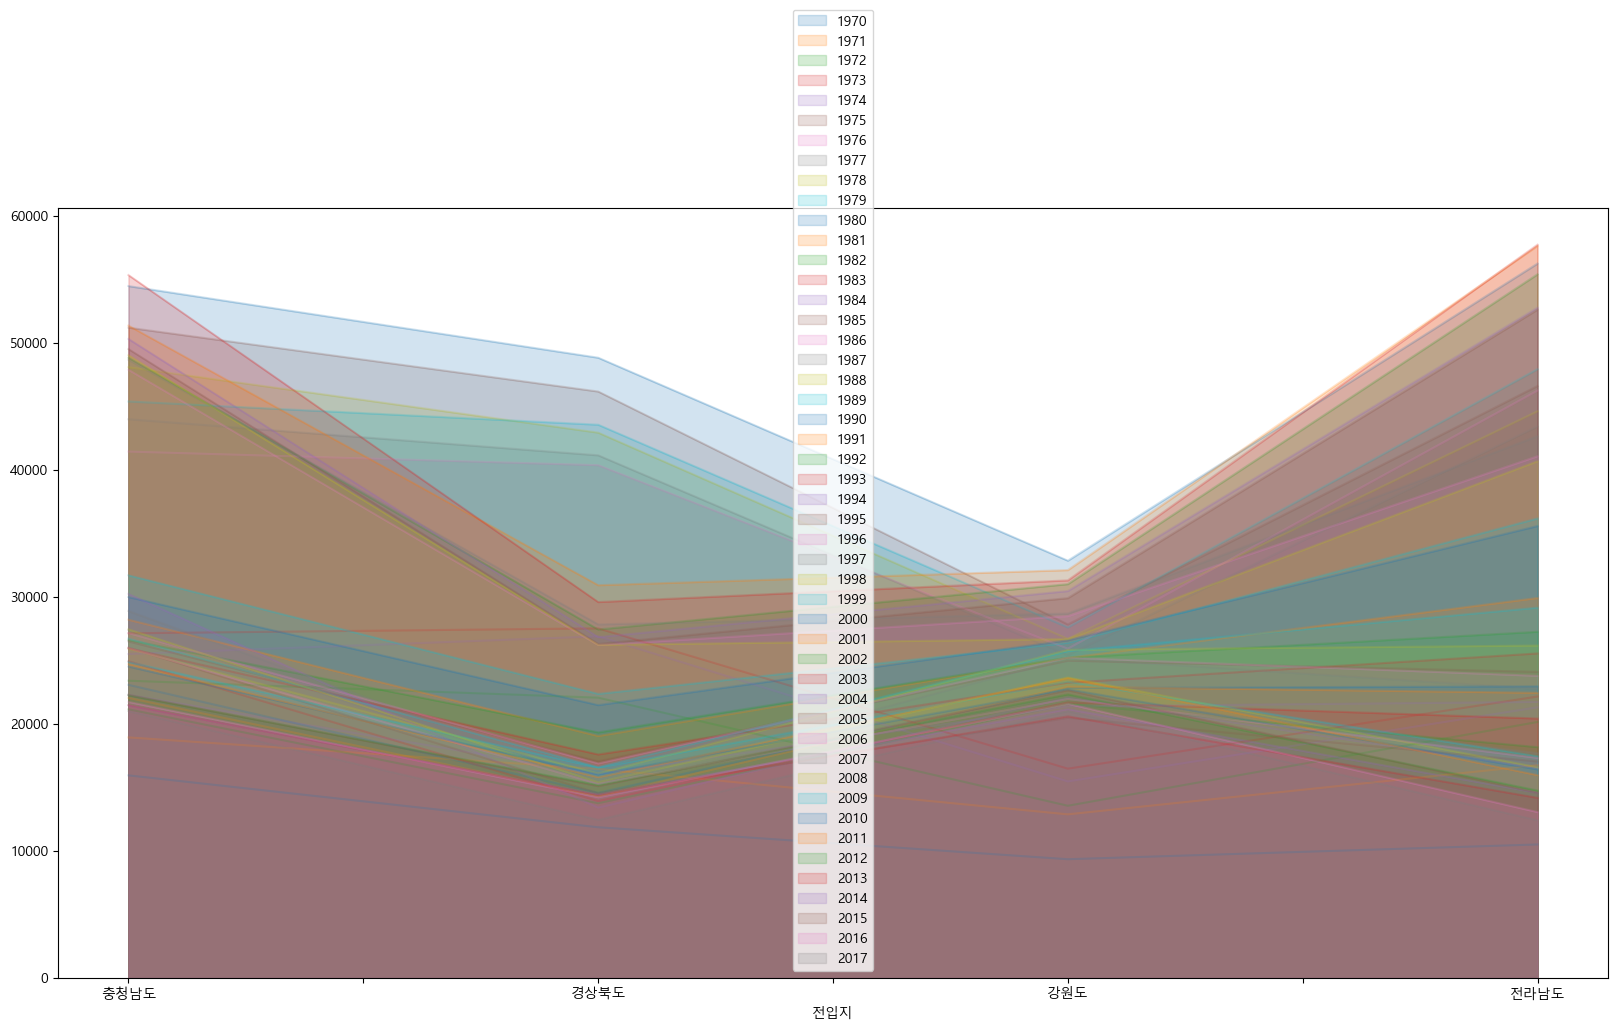

In [34]:
#df_4.plot() # 데이터프레임.plot()- 데이터프레임의 인덱스를 x축으로 열들을 값으로 그래프 그려진다. 
#df_4[ ['강원도', '전라남도']  ].plot()
print(df_4.head())
ax = df_4.plot( kind='area', stacked=False, alpha=0.2, figsize=(20, 10) )
print(type(ax), '~~') # type( 알고 싶은 내용 ) 
print( type(df_4), '~~~' )
a = 10
print( type( a ), '~~~~')

In [35]:
df_4.head()
df_4.index # 인덱스값 
# df_4.index = df_4.index.map( int )  교재처럼 '1970' -> 1970변경
# df_4.index


Index(['충청남도', '경상북도', '강원도', '전라남도'], dtype='object', name='전입지')

In [36]:
# part4-3
# 교재 197
# 면적 그래프 
import pandas as pd
import matplotlib.pyplot as plt
# 한글 처리
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)
# 데이터 불러오기
df = pd.read_excel('./data-4/시도별_전출입_인구수.xlsx')
df.head()
# 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합부분)
df = df.ffill()
df.head()
# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
# 전출지별 열을 삭제하기
df_seoul = df_seoul.drop(['전출지별'], axis=1)
# '전입지별'을 '전입지' 열이름 변경하기
df_seoul = df_seoul.rename({'전입지별': '전입지'}, axis=1)
df_seoul
# 전입지 열을 행 인덱스로 만들기
df_seoul = df_seoul.set_index('전입지')
df_seoul.head()
col_years = list( map(str, range(1970,2018) ) ) # ['1970', '1971']
df_4 = df_seoul.loc[ ['충청남도', '경상북도', '강원도', '전라남도'], col_years ]
df_4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [37]:
df_4.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
전라남도,10513,16755,20157,22160,21314,46610,46251,43430,44624,47934,...,16601,17468,16429,15974,14765,14187,14591,14598,13065,12426


In [41]:
df_4 = df_4.T # df_4.transpose() 전치행렬 (행과 열 바꾼 것)
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314
1975,51205,46177,27837,46610
1976,41447,40376,25927,46251
1977,43993,41155,25415,43430
1978,48091,42940,26700,44624
1979,45388,43565,27599,47934


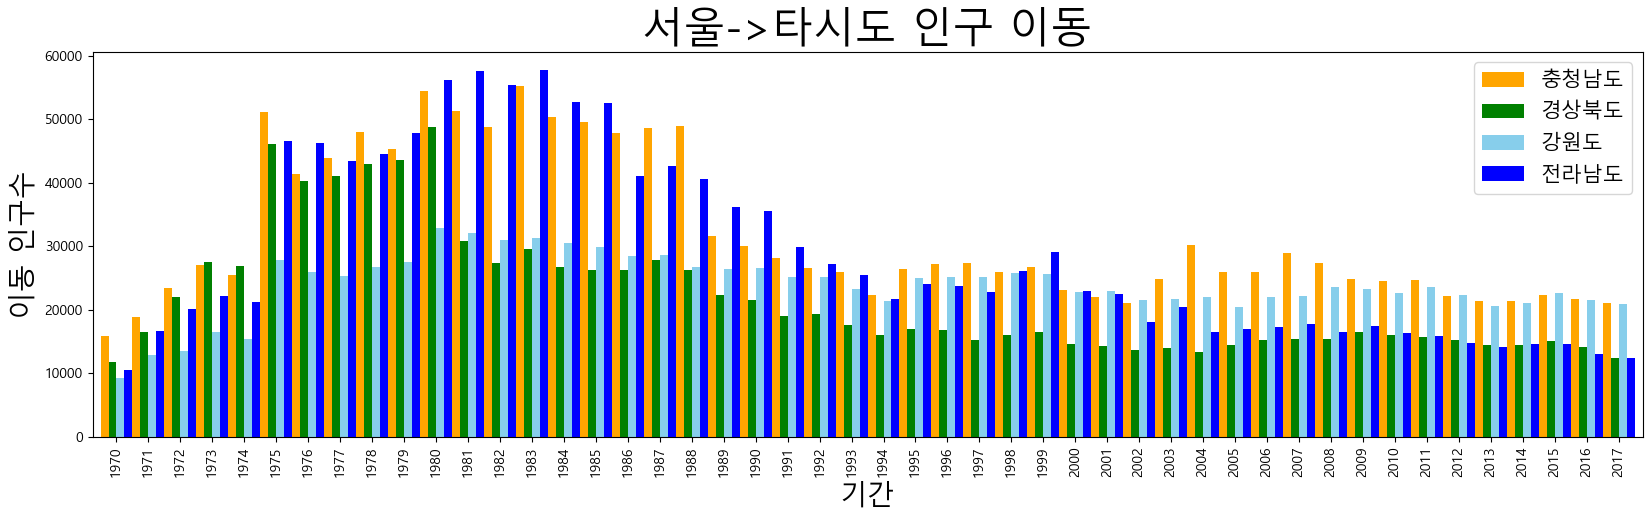

In [52]:
# 문자열로 된 인덱스를 '1970'를 1970 숫자형으로 바꾸기 
df_4.index
# 방법1
df_4.index = df_4.index.astype(int)
# 방법2
# 교재 202page 36줄 코드 df_4.index = df_4_index.map(int)
df_4.index

df_4.plot( kind='bar', figsize=(20, 5), width=1, color=['orange','green','skyblue','blue'] )

plt.title('서울->타시도 인구 이동', size=30)
plt.ylabel('이동 인구수',size=20)
plt.xlabel('기간', size=20)
plt.legend( loc='best', fontsize=15) 
plt.show()


In [68]:
df_4 = df_4.loc[ [1970,1975, 1980,1985,1990,1995,2000,2005,2010,2015],  : ]
df_4

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1975,51205,46177,27837,46610
1980,54480,48839,32858,56251
1985,49520,26297,29911,52629
1990,29993,21490,26591,35589
1995,26501,17064,24987,24100
2000,23083,14576,22832,22969
2005,26012,14550,20483,17049
2010,24522,16042,22736,16429
2015,22299,15113,22659,14598


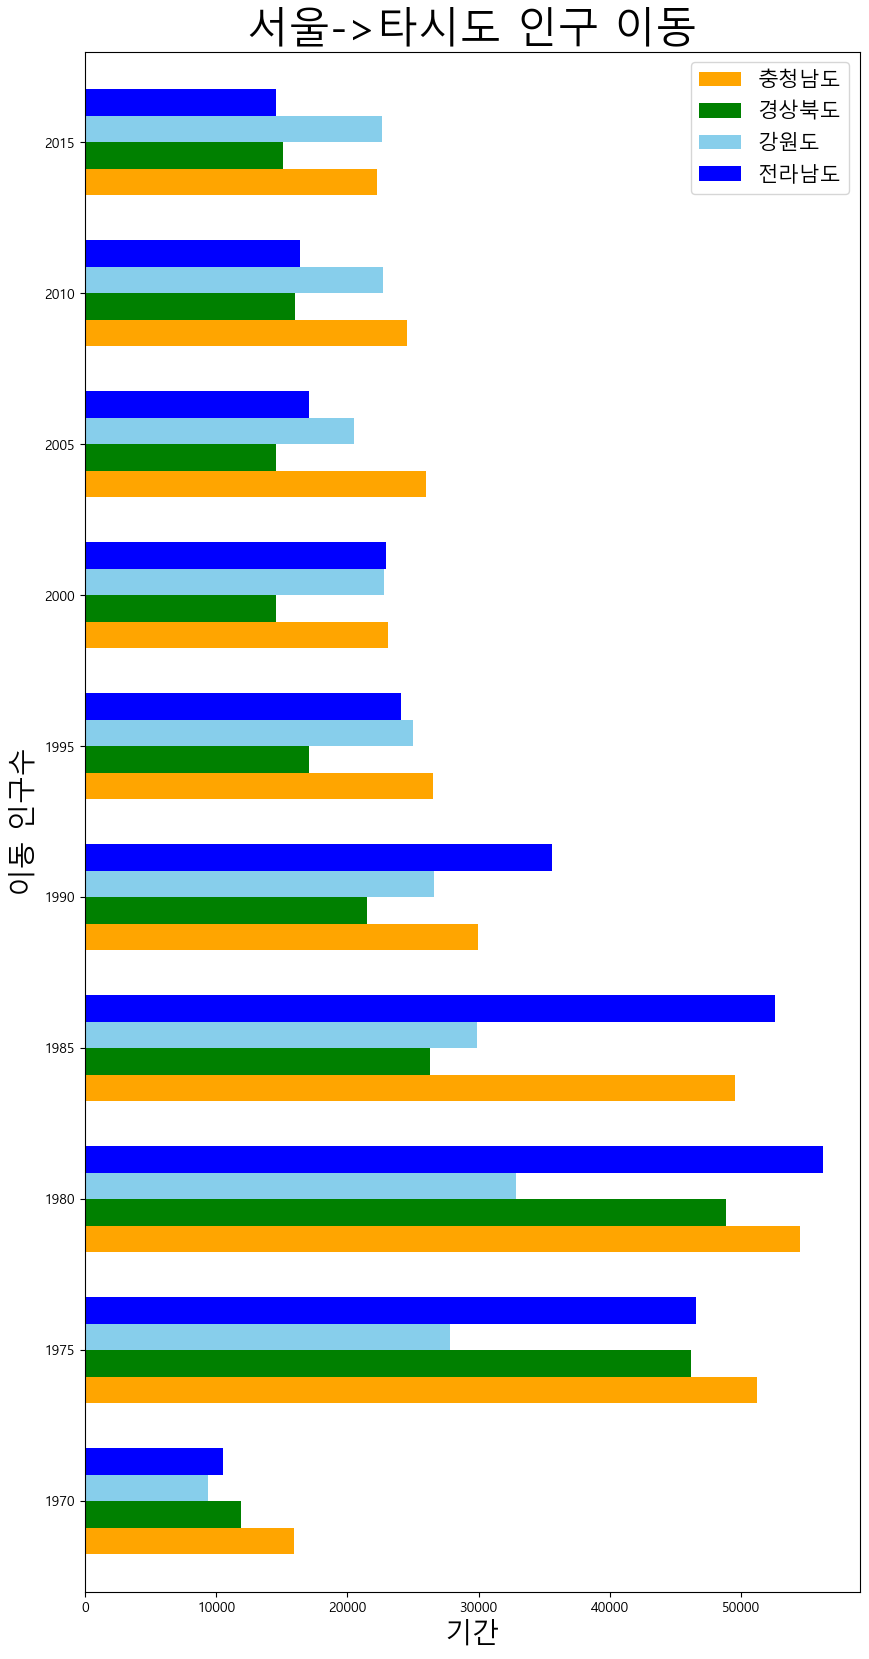

In [70]:
# 문자열로 된 인덱스를 '1970'를 1970 숫자형으로 바꾸기 
df_4.index

# 방법1
df_4.index = df_4.index.astype(int)
# 방법2
# 교재 202page 36줄 코드 df_4.index = df_4_index.map(int)
df_4.index

df_4.plot( kind='barh', figsize=(10, 20), width=0.7, color=['orange','green','skyblue','blue'] )

plt.title('서울->타시도 인구 이동', size=30)
plt.ylabel('이동 인구수',size=20)
plt.xlabel('기간', size=20)
plt.legend( loc='best', fontsize=15) 
plt.show()


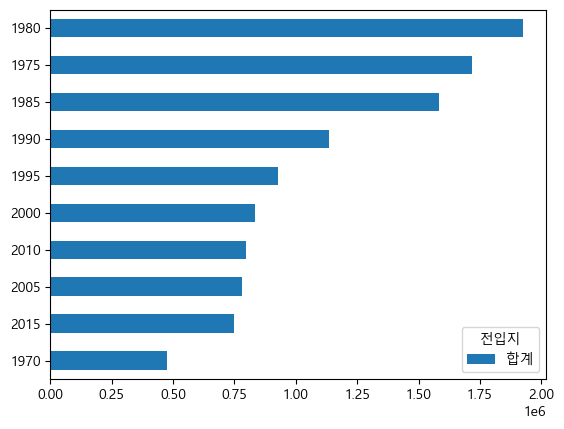

In [81]:
# 203 page 
df_4['합계'] = df_4.sum( axis = 1 ) # 열에 대한 합
df_4
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)
df_total
#type(df_total)
df_total.plot( kind='barh' )
plt.show()

In [106]:
# 205page 4-18 주측, 보조축 
import pandas as pd
import matplotlib.pyplot as plt

# 한글 처리
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.rcParams[ 'axes.unicode_minus'] = False # 마이너스 부호 출력 설정

df = pd.read_excel('./data-4/남북한발전전력량.xlsx')
df = df.loc[ 5:9 ] # 북한 자료만 추출
df.drop('전력량 (억㎾h)', axis=1, inplace=True ) # 열 삭제하기
# df = df.set_index('발전 전력별') 아래 코드와 같다
df.set_index('발전 전력별', inplace=True)
df
# 전치행렬
df = df.T
df
# '-' -> 0 : 1단계 '-'  --- 문자를 찾아서 다른 문자로 바꿈 -->  '0'  2단계 '0' -- float형으로 타입 바꾸기 --> 0
for col in df.columns:
    df[col] = df[col].replace('-', '0')
df = df.astype( float )
df.info()
df



<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1990 to 2016
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   합계      27 non-null     float64
 1   수력      27 non-null     float64
 2   화력      27 non-null     float64
 3   원자력     27 non-null     float64
dtypes: float64(4)
memory usage: 1.1+ KB


발전 전력별,합계,수력,화력,원자력
1990,277.0,156.0,121.0,0.0
1991,263.0,150.0,113.0,0.0
1992,247.0,142.0,105.0,0.0
1993,221.0,133.0,88.0,0.0
1994,231.0,138.0,93.0,0.0
1995,230.0,142.0,88.0,0.0
1996,213.0,125.0,88.0,0.0
1997,193.0,107.0,86.0,0.0
1998,170.0,102.0,68.0,0.0
1999,186.0,103.0,83.0,0.0


In [111]:
# '합계'열의 이름을 '총발전량' 열이름 바꾸기
df = df.rename( columns = {'합계':'총발전량' })

df['총발전량-1년'] = df['총발전량'].shift(1) #한 행씩 아래로 이동하는 것 
df['증감률'] = ( (df['총발전량'] / df['총발전량-1년']) - 1 ) * 100 
# 증감률 =  ( 현자료-이전자료  )/ 이전자료 * 100
df

발전 전력별,총발전량,수력,화력,원자력,총발전량-1년,증감률
1990,277.0,156.0,121.0,0.0,NaN,NaN
1991,263.0,150.0,113.0,0.0,277.0,-5.054152
1992,247.0,142.0,105.0,0.0,263.0,-6.083650
1993,221.0,133.0,88.0,0.0,247.0,-10.526316
1994,231.0,138.0,93.0,0.0,221.0,4.524887
1995,230.0,142.0,88.0,0.0,231.0,-0.432900
1996,213.0,125.0,88.0,0.0,230.0,-7.391304
1997,193.0,107.0,86.0,0.0,213.0,-9.389671
1998,170.0,102.0,68.0,0.0,193.0,-11.917098
1999,186.0,103.0,83.0,0.0,170.0,9.411765


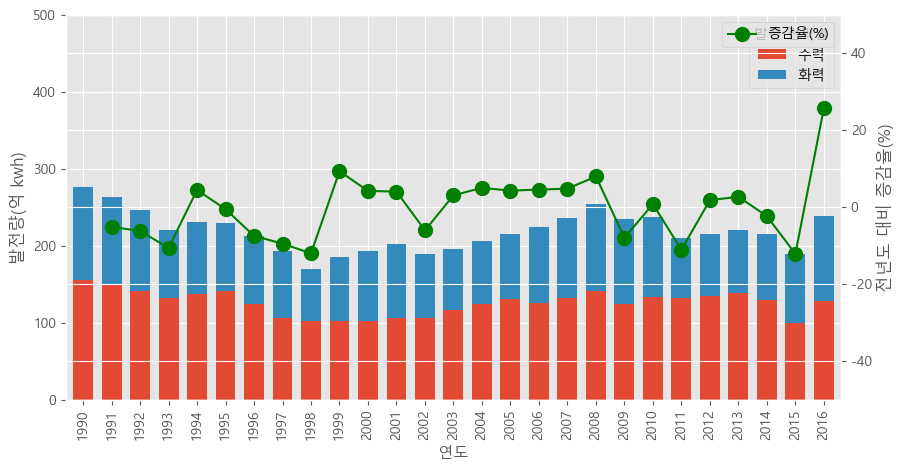

In [133]:
# 2축 그래프그리기
ax1 = df[ ['수력','화력'] ].plot( kind='bar', figsize=(10,5), width=0.7, stacked = True )
ax2 = ax1.twinx() # x축을 공유하기  ax1의 객체와 ax2객체가 x축을 공유한다. 
ax2.plot( df.index, df['증감률'], 'g-', markersize=10, marker='o',  label='증감율(%)' )
ax1.set_ylim( 0, 500)
ax2.set_ylim( -50, 50)
ax1.set_xlabel('연도', size=11)
ax1.set_ylabel('발전량(억 kwh)')
ax2.set_ylabel('전년도 대비 증감율(%)')
ax2.legend()
plt.show()


In [135]:
# 히스토그램 - 빈도수 구하는 그래프
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')
df = pd.read_csv('./data-4/auto-mpg.csv', header=None)
df

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year', 'origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<Axes: ylabel='Frequency'>

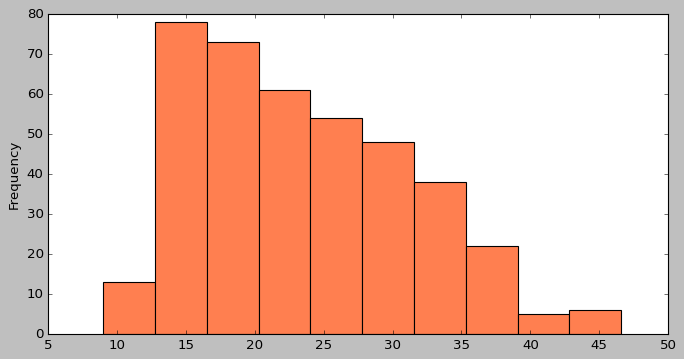

In [143]:
df['mpg'].plot( kind='hist', bins=10, color='coral', figsize=(10,5)  )
# bins 히스토그램의 가로축 구간의 갯수 

array([<Axes: title={'center': '1'}, ylabel='Frequency'>,
       <Axes: title={'center': '2'}, ylabel='Frequency'>,
       <Axes: title={'center': '3'}, ylabel='Frequency'>], dtype=object)

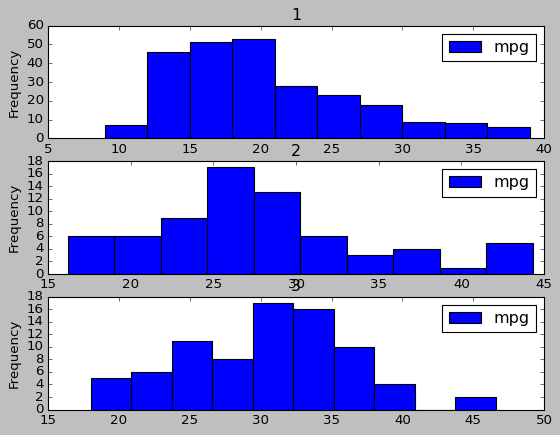

In [155]:
# 208page 원산지 국가 열을 기준으로 그룹별로 히스토 그램 그리기
df[ ['mpg', 'origin'] ].plot(by='origin', kind='hist' )

array([<Axes: title={'center': '3'}, ylabel='Frequency'>,
       <Axes: title={'center': '4'}, ylabel='Frequency'>,
       <Axes: title={'center': '5'}, ylabel='Frequency'>,
       <Axes: title={'center': '6'}, ylabel='Frequency'>,
       <Axes: title={'center': '8'}, ylabel='Frequency'>], dtype=object)

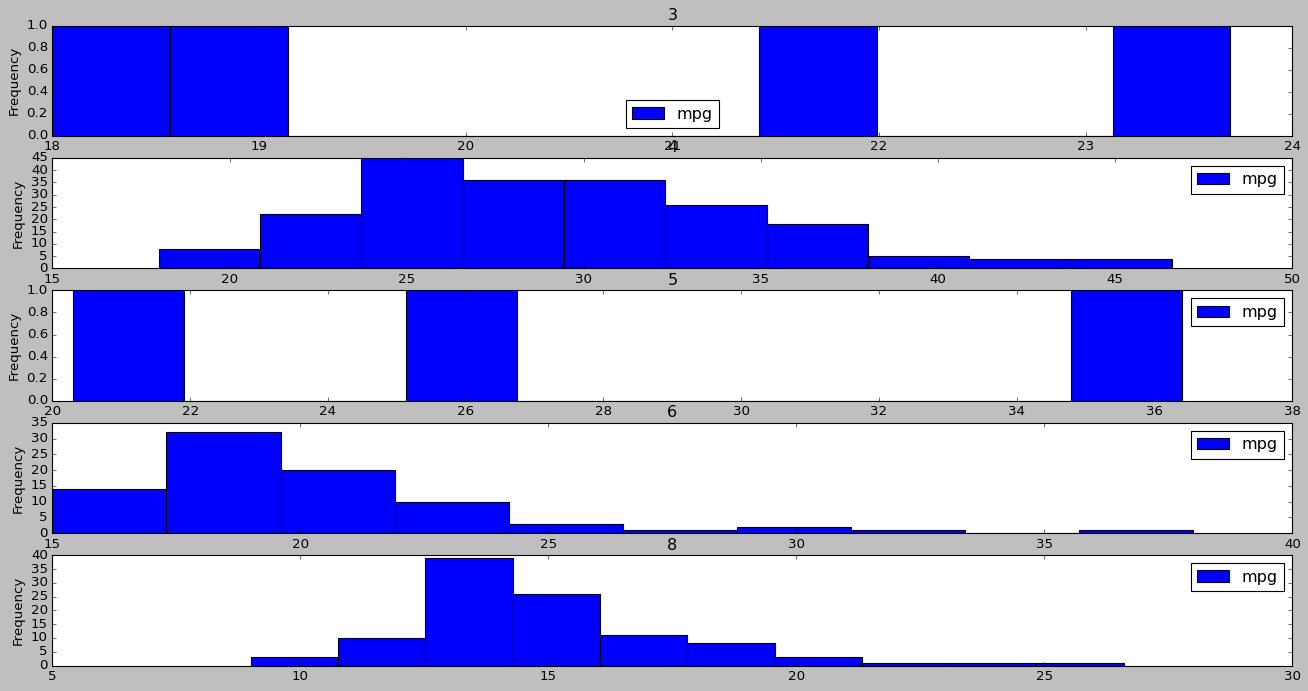

In [157]:
# 208page 실린더 열을 기준으로 그룹별로 히스토그램 그리기
df[ ['mpg', 'cylinders'] ].plot(by='cylinders', kind='hist', figsize=(20, 10) )

array([<Axes: title={'center': '(1, 4)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(1, 6)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(1, 8)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(2, 4)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(2, 5)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(2, 6)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(3, 3)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(3, 4)'}, ylabel='Frequency'>,
       <Axes: title={'center': '(3, 6)'}, ylabel='Frequency'>],
      dtype=object)

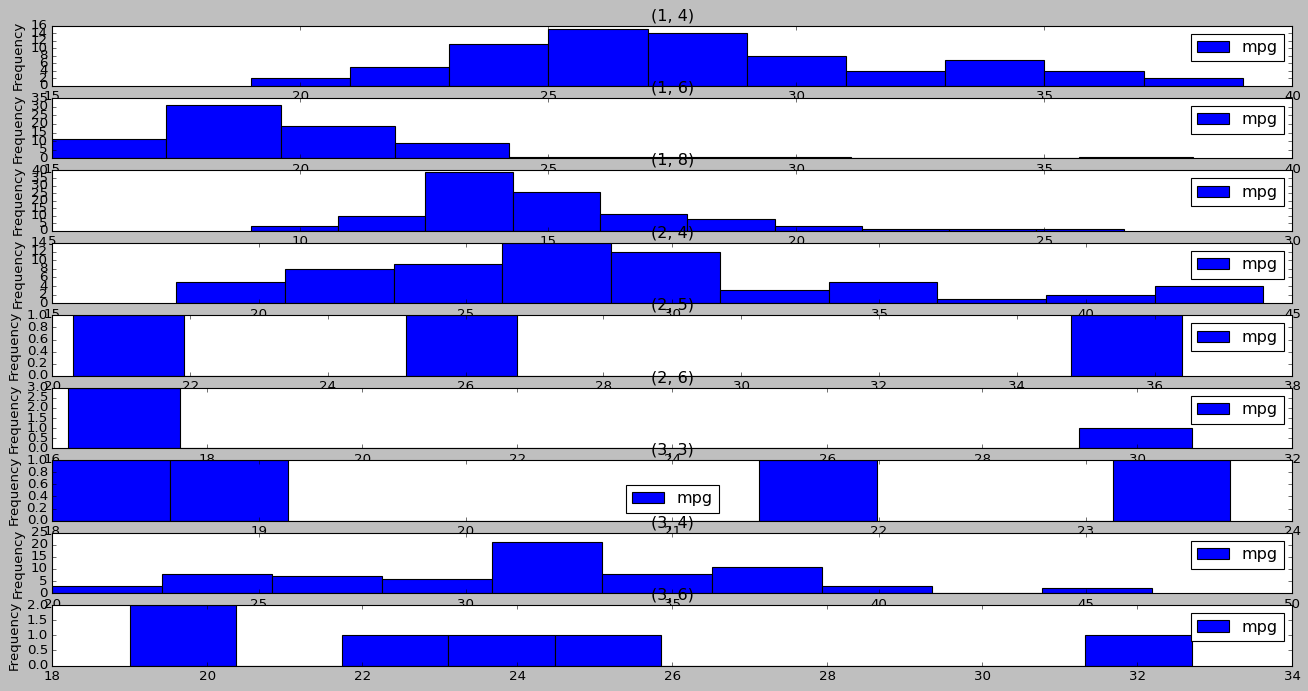

In [158]:
# 208page 원산지 실린더 열을 기준으로 그룹별로 히스토그램 그리기
df[ ['mpg', 'origin', 'cylinders'] ].plot(by=['origin','cylinders'], kind='hist', figsize=(20, 10) )

<Axes: ylabel='Frequency'>

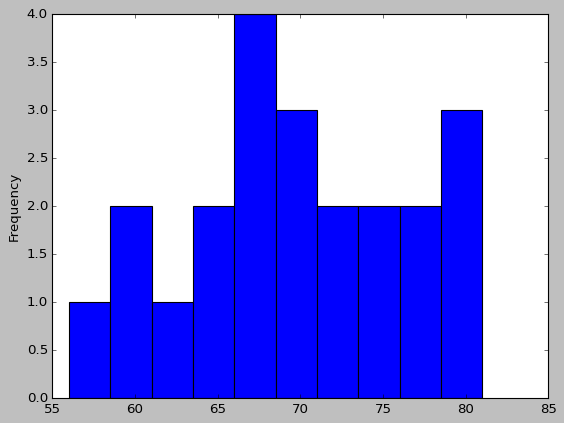

In [152]:
weight = [68, 81, 64, 56, 78, 74, 61, 77, 66, 68, 59, 71,
          80, 59, 67, 81, 69, 73, 69, 74, 70, 65]
# plt.hist( weight )
sr_weight = pd.Series(weight)
sr_weight
sr_weight.plot(kind='hist')
# plt.plot( sr_weight ) # 에러 해결